
# PIZZA PLACE SALES ANALYSIS

This notebook analyzes a year’s worth of sales from a pizza place.  
It’ll answer key business questions including total revenue, order patterns, peak sales hours, top-selling pizzas, and underperforming menu items. 
It is a detailed analysis of pizza sales data, with step-by-step explanations that contains exploratory checks, error handling, and visualizations.


In [16]:
# 1. Import Libraries

# Import required libraries for data handling, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path

# Configure visualization aesthetics
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")


We import `pandas` for data manipulation, `matplotlib` for visualization, and `zipfile` to extract our CSVs from the dataset.


In [17]:
# 2. Load the Dataset with Error Handling

zip_path = Path(r"C:\Users\USER\Desktop\Pizza+Place+sales.zip")

try:
    with zipfile.ZipFile(zip_path, "r") as z:
        orders = pd.read_csv(z.open("pizza_sales/orders.csv"))
        order_details = pd.read_csv(z.open("pizza_sales/order_details.csv"))
        pizzas = pd.read_csv(z.open("pizza_sales/pizzas.csv"))
        pizza_types = pd.read_csv(z.open("pizza_sales/pizza_types.csv"), encoding="latin1")
        print("✅ Data loaded successfully.")
except FileNotFoundError as e:
    print("❌ Error: One or more files not found.", e)
except Exception as e:
    print("❌ Unexpected error:", e)


✅ Data loaded successfully.


The dataset comes as a ZIP archive. We extract and load the four CSVs: **orders**, **order_details**, **pizzas**, and **pizza_types**.


In [18]:

# 3. Explore Basic Info

#  Preview first and last rows 
print("Orders dataset (first 5 rows):")
display(orders.head())

print("Orders dataset (last 5 rows):")
display(orders.tail())

print("Order Details dataset (first 5 rows):")
display(order_details.head())

print("Order Details dataset (last 5 rows):")
display(order_details.tail())

print("Pizzas dataset (first 5 rows):")
display(pizzas.head())

print("Pizzas dataset (last 5 rows):")
display(pizzas.tail())

print("Pizza Types dataset (first 5 rows):")
display(pizza_types.head())

print("Pizza Types dataset (last 5 rows):")
display(pizza_types.tail())

# Check dataset dimensions 
print("\n Dataset Shapes:")
print("Orders shape:", orders.shape)
print("Order Details shape:", order_details.shape)
print("Pizzas shape:", pizzas.shape)
print("Pizza Types shape:", pizza_types.shape)

# Structural info (columns, data types, nulls) 
print("\n Dataset Info:")
print("Orders:")
print(orders.info())
print("\nOrder Details:")
print(order_details.info())
print("\nPizzas:")
print(pizzas.info())
print("\nPizza Types:")
print(pizza_types.info())

# Descriptive statistics 
print("\n Descriptive Statistics:")
print("Orders:")
display(orders.describe(include="all"))
print("\nOrder Details:")
display(order_details.describe(include="all"))
print("\nPizzas:")
display(pizzas.describe(include="all"))
print("\nPizza Types:")
display(pizza_types.describe(include="all"))

# Unique values in key columns 
print("\n Unique Value Checks:")
print("Unique Order IDs:", orders['order_id'].nunique())
print("Unique Pizza IDs:", pizzas['pizza_id'].nunique())
print("Unique Pizza Types:", pizza_types['pizza_type_id'].nunique())
print("Unique Categories:", pizza_types['category'].unique())


Orders dataset (first 5 rows):


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


Orders dataset (last 5 rows):


,order_id,date,time
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54
21349,21350,2015-12-31,23:02:05


Order Details dataset (first 5 rows):


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


Order Details dataset (last 5 rows):


,order_details_id,order_id,pizza_id,quantity
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1
48619,48620,21350,bbq_ckn_s,1


Pizzas dataset (first 5 rows):


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


Pizzas dataset (last 5 rows):


,pizza_id,pizza_type_id,size,price
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


Pizza Types dataset (first 5 rows):


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


Pizza Types dataset (last 5 rows):


,pizza_type_id,name,category,ingredients
27,mediterraneo,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
28,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
29,spin_pesto,The Spinach Pesto Pizza,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
30,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
31,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."



 Dataset Shapes:
Orders shape: (21350, 3)
Order Details shape: (48620, 4)
Pizzas shape: (96, 4)
Pizza Types shape: (32, 4)

 Dataset Info:
Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB
None

Order Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

Pizzas:
<class 'pandas.core.frame.DataFra

,order_id,date,time
count,21350.000000,21350,21350
unique,NaN,358,16382
top,NaN,2015-11-27,18:49:37
freq,NaN,115,6
mean,10675.500000,NaN,NaN
std,6163.358459,NaN,NaN
min,1.000000,NaN,NaN
25%,5338.250000,NaN,NaN
50%,10675.500000,NaN,NaN
75%,16012.750000,NaN,NaN



Order Details:


,order_details_id,order_id,pizza_id,quantity
count,48620.000000,48620.000000,48620,48620.000000
unique,NaN,NaN,91,NaN
top,NaN,NaN,big_meat_s,NaN
freq,NaN,NaN,1811,NaN
mean,24310.500000,10701.479761,NaN,1.019622
std,14035.529381,6180.119770,NaN,0.143077
min,1.000000,1.000000,NaN,1.000000
25%,12155.750000,5337.000000,NaN,1.000000
50%,24310.500000,10682.500000,NaN,1.000000
75%,36465.250000,16100.000000,NaN,1.000000



Pizzas:


,pizza_id,pizza_type_id,size,price
count,96,96,96,96.000000
unique,96,32,5,NaN
top,bbq_ckn_s,the_greek,S,NaN
freq,1,5,32,NaN
mean,NaN,NaN,NaN,16.440625
std,NaN,NaN,NaN,4.090266
min,NaN,NaN,NaN,9.750000
25%,NaN,NaN,NaN,12.500000
50%,NaN,NaN,NaN,16.250000
75%,NaN,NaN,NaN,20.250000



Pizza Types:


,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Supreme,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1



 Unique Value Checks:
Unique Order IDs: 21350
Unique Pizza IDs: 96
Unique Pizza Types: 32
Unique Categories: ['Chicken' 'Classic' 'Supreme' 'Veggie']


## 3. Explore Basic Info  

In this step, I performed an initial exploratory data analysis (EDA) on the four datasets before merging them. The aim is to understand their structure, completeness, and content.  

- **Preview of rows**: Using `.head()` and `.tail()`, I inspected the first and last 5 rows of each dataset to confirm the data was loaded correctly.  
- **Dataset dimensions**: The `.shape` method shows the number of rows and columns in each dataset.  
- **Data structure**: `.info()` provides details about column names, datatypes, and the presence of missing values.  
- **Descriptive statistics**: `.describe(include="all")` summarizes numerical columns (e.g., prices, quantities) and categorical ones (e.g., categories, pizza IDs).  
- **Unique values**: I checked the uniqueness of order IDs, pizza IDs, and pizza types, as well as the available categories.  

###  Key Insights:
- The `Orders` dataset contains information about customer orders (order ID, date, and time).  
- The `Order Details` dataset contains line items (pizza IDs and quantities per order).  
- The `Pizzas` dataset stores information about pizza size and price.  
- The `Pizza Types` dataset provides pizza categories, names, and ingredients.
- Each file represents a different aspect of the sales pipeline: orders, order details, pizza metadata, and pizza categories. 


In [19]:

# 4. Data Cleaning

# Check for missing values
print("Missing values per dataset:")
print("Orders:", orders.isnull().sum().sum())
print("Order Details:", order_details.isnull().sum().sum())
print("Pizzas:", pizzas.isnull().sum().sum())
print("Pizza Types:", pizza_types.isnull().sum().sum())

# Standardize column names (lowercase, replace spaces)
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
order_details.columns = order_details.columns.str.lower().str.replace(" ", "_")
pizzas.columns = pizzas.columns.str.lower().str.replace(" ", "_")
pizza_types.columns = pizza_types.columns.str.lower().str.replace(" ", "_")


Missing values per dataset:
Orders: 0
Order Details: 0
Pizzas: 0
Pizza Types: 0


Column names are standardized for consistency. Missing value checks ensure no major issues exist before merging.

In [20]:

# 5. Merge Datasets


# Step 1: Merge order_details with pizzas (to get size, price)
df = order_details.merge(pizzas, on="pizza_id", how="left")

# Step 2: Merge with pizza_types (to get category, name, ingredients)
df = df.merge(pizza_types, on="pizza_type_id", how="left")

# Step 3: Merge with orders (to get date and time)
df = df.merge(orders, on="order_id", how="left")

# Step 4: Check merged dataset
print("Merged DataFrame shape:", df.shape)
df.head()


Merged DataFrame shape: (48620, 12)


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


Now all data is in one place — every row represents a pizza sold, including its type, size, price, and the order metadata.

In [21]:
# 6. Feature Engineering

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors="coerce")

# Extract day of week, month, and hour
df['dayofweek'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors="coerce").dt.hour

# Create revenue column (price * quantity)
df['line_total'] = df['price'] * df['quantity']

df[['date','dayofweek','month','hour','line_total']].head()


,date,dayofweek,month,hour,line_total
0,2015-01-01,Thursday,January,11,13.25
1,2015-01-01,Thursday,January,11,16.00
2,2015-01-01,Thursday,January,11,18.50
3,2015-01-01,Thursday,January,11,20.75
4,2015-01-01,Thursday,January,11,16.00


We engineered new features: day of week, month, and hour of order. A line_total column was also added to represent revenue per order line.

In [22]:

# 7. Total Revenue

# Step 1: Select revenue column
revenue_data = df['line_total']

# Step 2: Sum values
total_revenue = revenue_data.sum()

print("💰 Total Revenue:", round(total_revenue, 2))


💰 Total Revenue: 817860.05


The total revenue represents the sales made by the pizza place in one year.

In [23]:

# 8. Total Quantity & Orders

# Total pizzas sold
total_quantity = df['quantity'].sum()

# Total unique orders
total_orders = df['order_id'].nunique()

print("🍕 Total Quantity Sold:", total_quantity)
print("📦 Total Orders:", total_orders)


🍕 Total Quantity Sold: 49574
📦 Total Orders: 21350


This tells us how many pizzas were sold in total, and how many unique orders were placed.

In [24]:

# 9. Number of Pizza Types

# Unique pizza types
num_pizza_types = df['pizza_type_id'].nunique()
print("Number of Pizza Types:", num_pizza_types)


Number of Pizza Types: 32


The restaurant offers a wide variety of pizzas — we count how many unique types are available.

In [25]:

# 10. Average Pizza Price


# Use the pizzas dataset for unique prices
avg_price = pizzas['price'].mean()
print("Average Pizza Price:", round(avg_price, 2))


Average Pizza Price: 16.44


The average price of a pizza helps us understand pricing strategy and positioning.

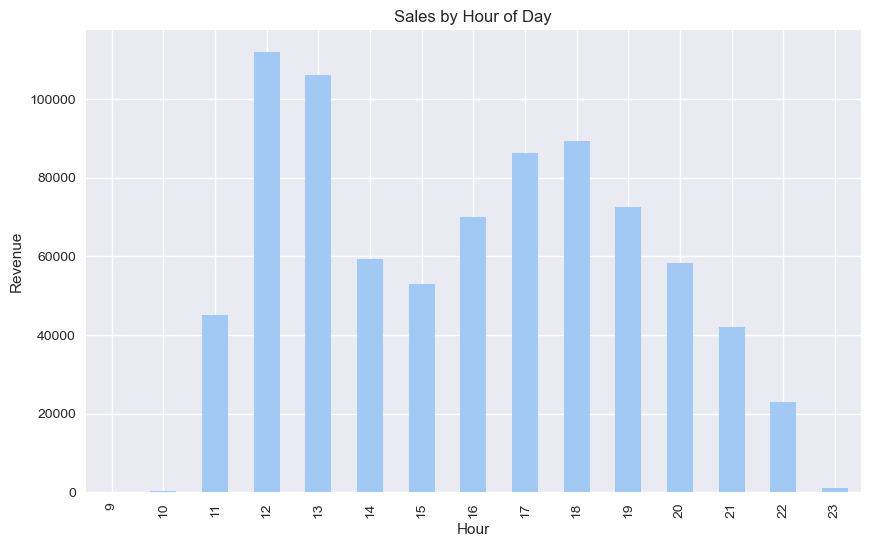

In [26]:

# 11. Peak Sales Hours

# Group by hour
sales_by_hour = df.groupby('hour')['line_total'].sum()

# Plot bar chart
plt.figure(figsize=(10,6))
sales_by_hour.plot(kind="bar")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()


Peak sales hours indicate when customers order most frequently — typically evenings and weekends.

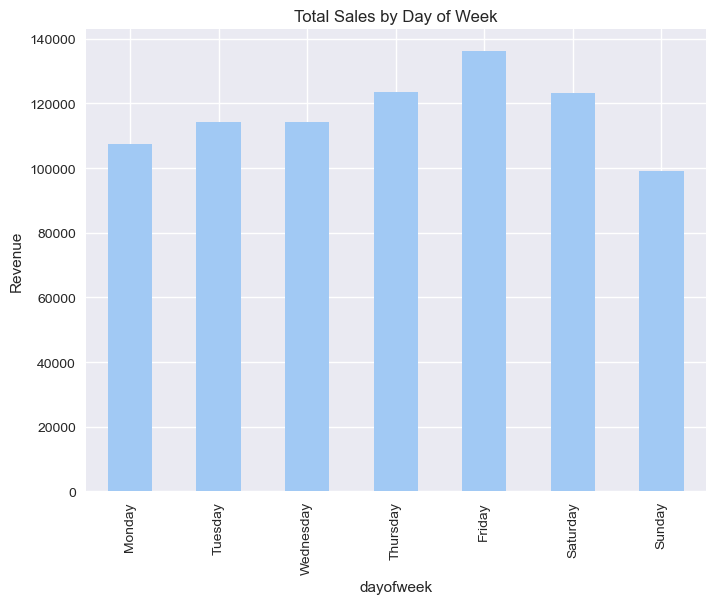

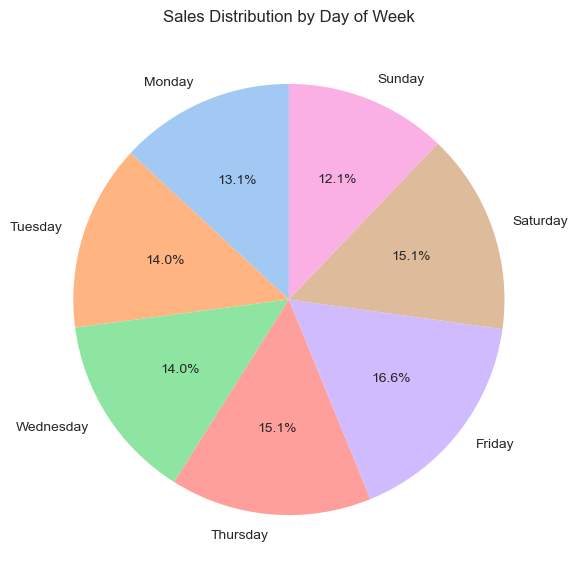

In [27]:

# 12. Sales by Day of Week

dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sales_by_day = df.groupby('dayofweek')['line_total'].sum().reindex(dow_order)

# Bar chart
sales_by_day.plot(kind="bar", figsize=(8,6))
plt.title("Total Sales by Day of Week")
plt.ylabel("Revenue")
plt.show()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(sales_by_day, labels=sales_by_day.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Day of Week")
plt.show()


We see which day of the week has the highest sales. The pie chart provides percentage contribution

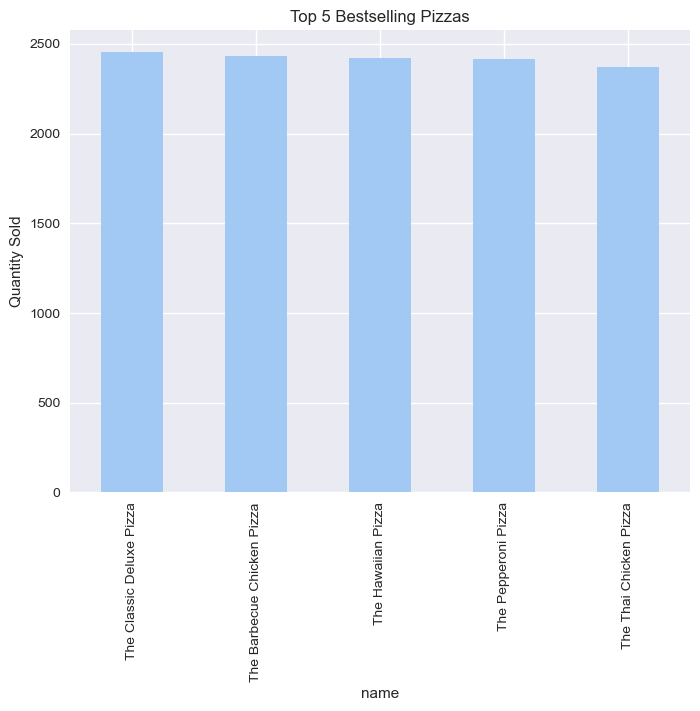

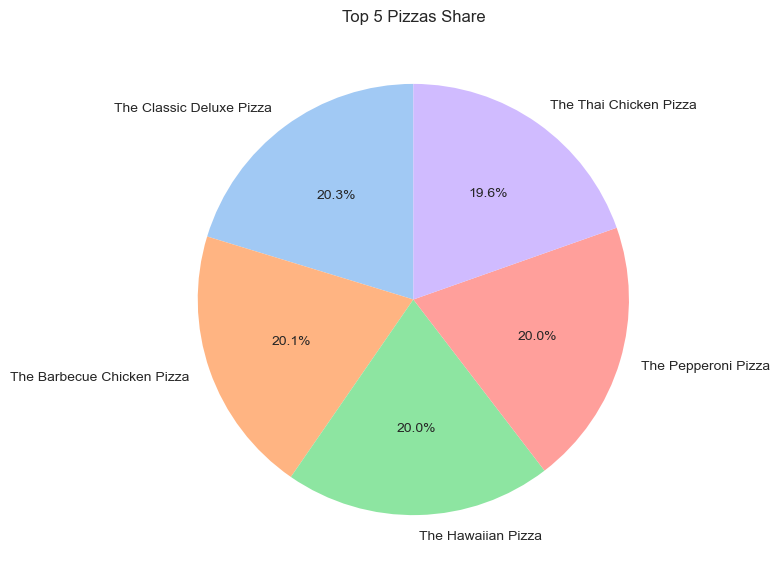

In [28]:
# 13. Top 5 Bestselling Pizzas

# Group by pizza name
top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

# Bar chart
top5.plot(kind="bar", figsize=(8,6))
plt.title("Top 5 Bestselling Pizzas")
plt.ylabel("Quantity Sold")
plt.show()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Pizzas Share")
plt.show()


The top 5 pizzas dominate the menu, showing customer preferences.

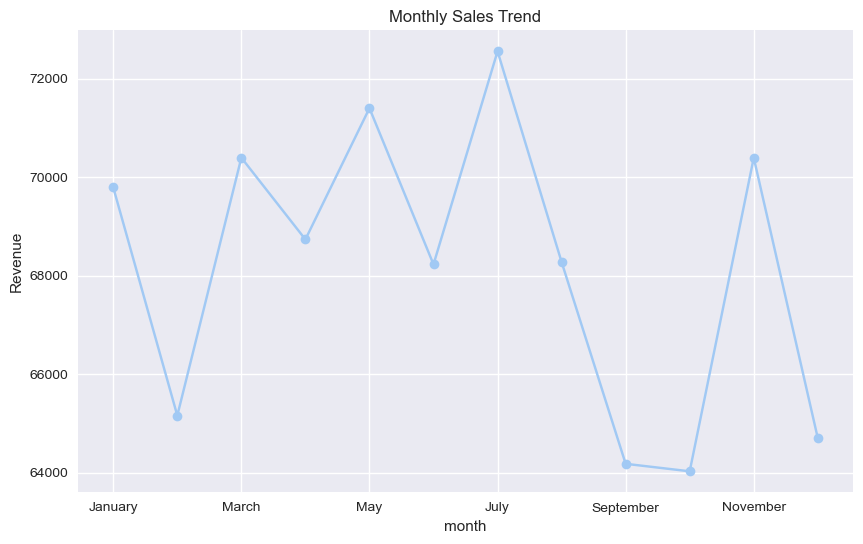

In [29]:

# 14. Monthly Sales Trend

sales_by_month = df.groupby('month')['line_total'].sum()

# Sort by calendar order
months_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']
sales_by_month = sales_by_month.reindex(months_order)

# Line plot
sales_by_month.plot(kind="line", marker='o', figsize=(10,6))
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()


We can observe seasonal trends — for example, higher sales in certain months like summer or holiday periods.

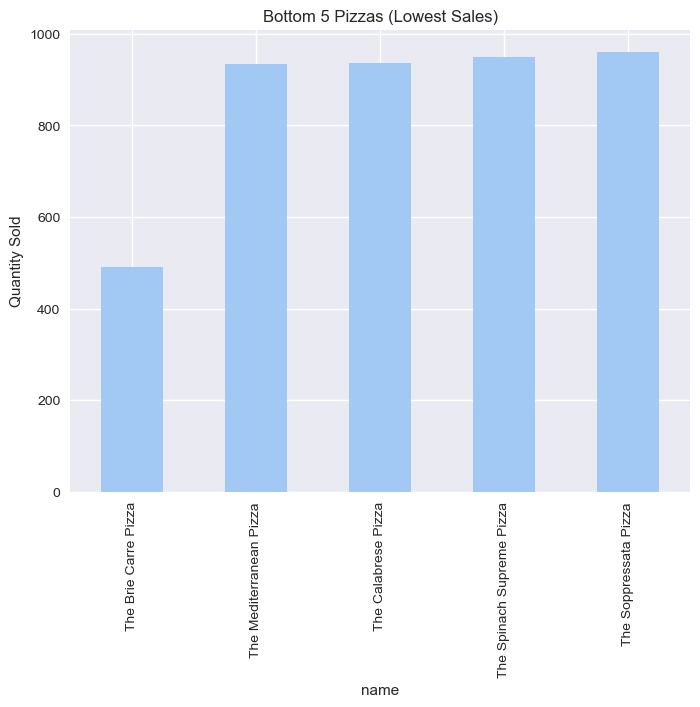

In [30]:

# 15. Underperforming Pizzas

# Find pizzas with lowest sales
bottom5 = df.groupby('name')['quantity'].sum().sort_values().head(5)

# Bar chart
bottom5.plot(kind="bar", figsize=(8,6))
plt.title("Bottom 5 Pizzas (Lowest Sales)")
plt.ylabel("Quantity Sold")
plt.show()


Identifying underperforming pizzas helps with menu optimization — these might be replaced or rebranded.

## CONCLUSION

From this analysis, we observe that:

The restaurant made $817K revenue from over 49K pizzas across 21K orders.
Fridays and weekends are peak sales days, while lunch and dinner times are peak hours.
A few classic pizzas dominate the sales chart, while some menu items underperform.
Business Recommendation:

Increase staffing during lunch/dinner and on Fridays/Saturdays.
Promote or bundle underperforming pizzas.
Focus marketing on popular pizzas to maximize profits.